In [18]:
from ampl import parse_ampl_table
from io import StringIO

with open("../out/z2-a-out.dat") as file:
    z2_a_df = parse_ampl_table(file)

z2_a_df

TypeError: only integer scalar arrays can be converted to a scalar index

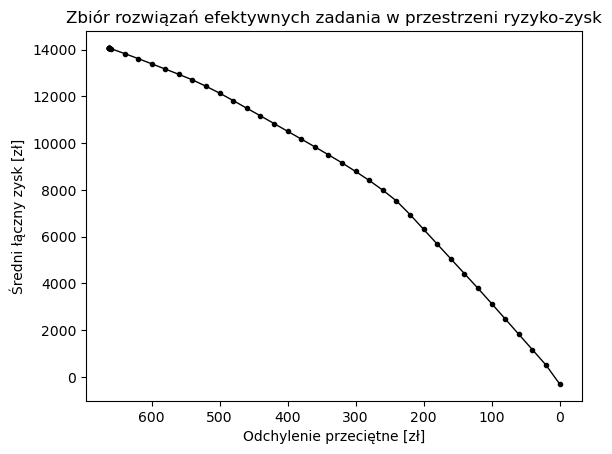

In [3]:
import numpy as np
from matplotlib import pyplot as plt


ax = plt.subplot(1, 1, 1)
ax.plot(z2_a_df["out_risk"], z2_a_df["out_profit_average"], "ko-", linewidth=1, markersize=3)
ax.invert_xaxis()
plt.title("Zbiór rozwiązań efektywnych zadania w przestrzeni ryzyko-zysk")
plt.xlabel("Odchylenie przeciętne [zł]")
plt.ylabel("Średni łączny zysk [zł]")
plt.savefig("../out/z2-a-plot.png")
plt.show()

In [5]:
from ampl import parse_ampl_set, parse_ampl_table

with open("../out/z2-c-out.dat") as file:
    z2_c_risks_max = parse_ampl_set(file)
    display(z2_c_risks_max)

    z2_c_dfs = [parse_ampl_table(file, names={1: "risk"}) for _ in z2_c_risks_max]
    display(z2_c_dfs[0].head())

0    100
1    400
2    740
Name: in_a_risk, dtype: int64

,profit,risk
1,3190.41,52.4711
2,3381.01,243.067
3,3018.16,119.783
4,3238.39,100.451
5,3141.21,3.27123


In [13]:
import pandas as pd

data = np.array([df["profit"] for df in z2_c_dfs])
data = np.sort(data, 1)
n_scenarios = data.shape[1]
headers = [f"{(i+1)/n_scenarios:.2f}" for i in range(n_scenarios)]
index = pd.Index(z2_c_risks_max, name="a_risk")
profits_sorted = pd.DataFrame(data, columns=headers, index=index)
profits_sorted["R"] = np.array(range(len(data))) + 1
profits_sorted = profits_sorted.set_index("R", append=True)
profits_sorted

,,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
a_risk,R,,,,,,,,,,,,,,,,,,,,,
100,1,2843.63,2853.51,2864.79,2871.54,2897.25,2909.82,2916.75,2918.6,2926.55,2957.49,...,3305.36,3308.1,3328.85,3361.31,3369.17,3379.42,3381.01,3393.06,3416.98,3429.93
400,2,9145.04,9345.1,9397.9,9518.35,9528.94,9539.58,9592.79,9697.26,9716.08,9808.76,...,11138.0,11169.0,11181.2,11184.2,11263.5,11307.9,11321.9,11358.4,11445.4,11710.9
740,3,11899.7,12086.3,12185.0,12302.0,12574.2,12595.8,12615.1,12802.1,12906.1,12918.3,...,15135.1,15197.8,15253.9,15322.6,15460.8,15500.0,15553.1,15566.7,15717.3,16139.1


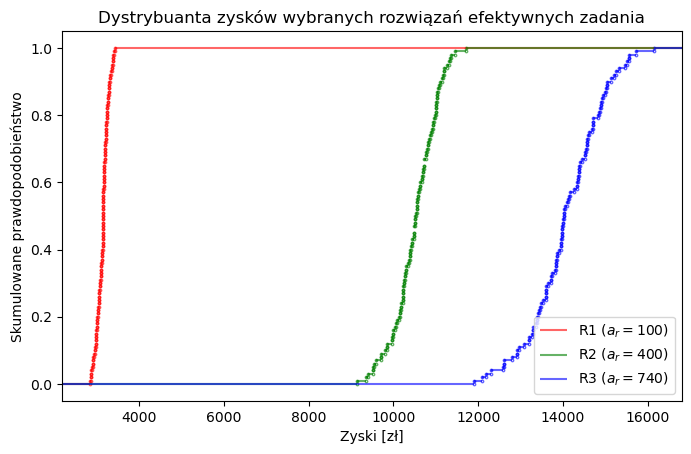

In [11]:
profit_max = profits_sorted.values[:, -1].max()
profit_min = profits_sorted.values[:, 0].min()
margin = (profit_max - profit_min) * 0.05
plt.figure(figsize=(8, 4.8))

for (key, row), color in zip(profits_sorted.iterrows(), "rgb"):
    label = f"R{key[1]} ($a_r = {key[0]}$)"
    
    # lines
    xs = np.array([profit_min - margin, *row.values, profit_max + margin])
    ys = np.array(range(n_scenarios + 1)) / n_scenarios
    plt.hlines(ys, xs[:-1], xs[1:], color, label=label, alpha=0.6)

    # start points
    filter = [True] + [x1 != x2 for x1, x2 in zip(xs[1:-2], xs[2:-1])]
    style={"s": 3, "facecolors":"white", "edgecolors": color, "alpha": 0.6}
    plt.scatter(xs[1:-1][filter], ys[:-1][filter], **style)

    # end points
    filter = [x1 != x2 for x1, x2 in zip(xs[1:-2], xs[2:-1])] + [True]
    style={"s": 3, "c": color, "alpha": 0.6}
    plt.scatter(xs[1:-1][filter], ys[1:][filter], **style)

plt.title("Dystrybuanta zysków wybranych rozwiązań efektywnych zadania")
plt.xlabel("Zyski [zł]")
plt.ylabel("Skumulowane prawdopodobieństwo")
plt.legend(loc="lower right")
plt.xlim((profit_min - margin, profit_max + margin))
plt.savefig("../out/z2-c-plot.png")
plt.show()